In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:
img = plt.imread("C:/Users/Administrator/Desktop/CV/road.jpg")

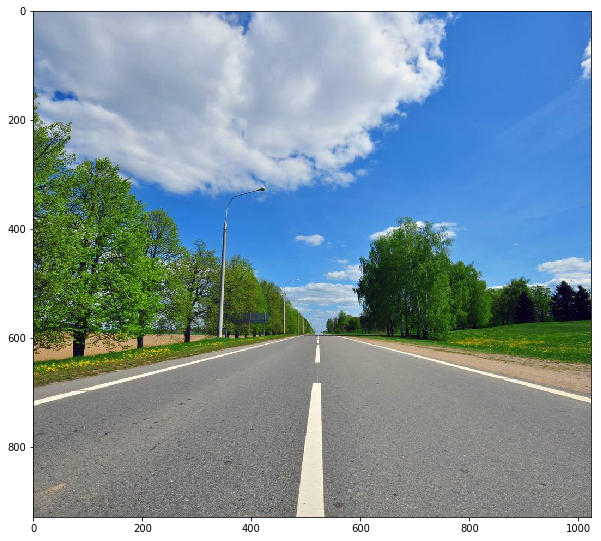

In [15]:
figure = plt.figure(figsize = (10, 10))
plt.imshow(img)
plt.show()

In [19]:
blurred = cv2.GaussianBlur(img, (3, 3), 1)
gray = cv2.cvtColor(blurred, cv2.COLOR_RGB2GRAY)
edge = cv2.Canny(gray, 100, 200)

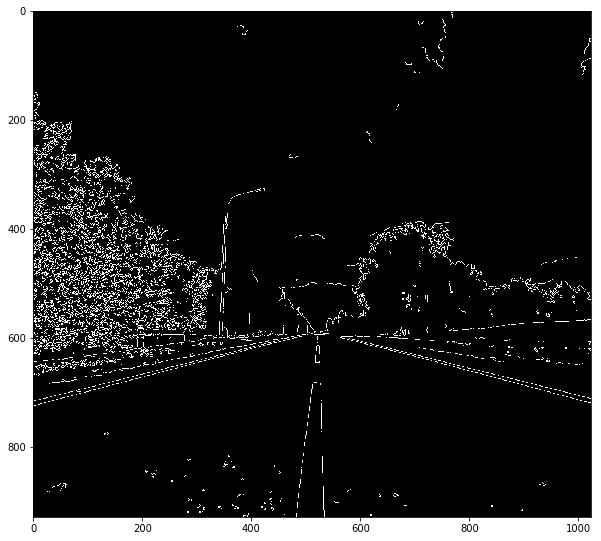

In [21]:
figure = plt.figure(figsize = (10, 10))
plt.imshow(edge, cmap = 'gray')
plt.show()

In [46]:
thetas = np.deg2rad(np.arange(0, 180, 0.1))
row, cols = edge.shape
diag_len = np.ceil(np.sqrt(row ** 2 + cols ** 2))
ds = np.linspace(-diag_len, diag_len, int(2 * diag_len + 1))

In [47]:
ds

array([-1383., -1382., -1381., ...,  1381.,  1382.,  1383.])

In [48]:
type(diag_len)

numpy.float64

In [49]:
# vote投票 经过每个边缘上的点的直线可以由无数条，但在Hough Space中就是一条直线
# 每个边缘点都可以投一票，票数较多的就是检测出的直线
num_theta = len(thetas)
accumlator = np.zeros((int(2 * diag_len + 1), num_theta), dtype=np.uint64)

y_idx, x_idx = np.nonzero(edge)

for i in range(len(x_idx)):
    x, y = x_idx[i], y_idx[i]
    for j in range(num_theta):
        d = int(x * np.cos(thetas[j]) + y * np.sin(thetas[j])) + int(diag_len)
        # ds是[-diag_len, diag_len]
        accumlator[d, j] += 1

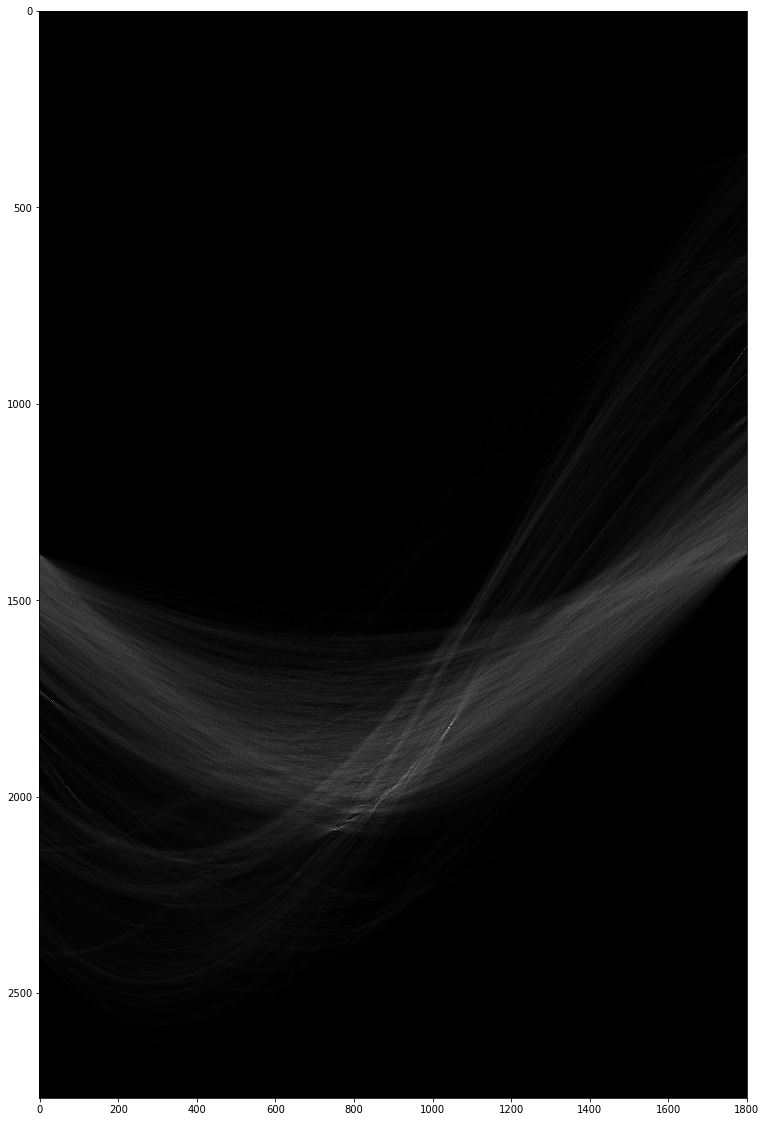

In [51]:
# 这是每0.1°取一点，角度分的太细 导致计算速度太慢 所以还是1°取一点比较好
# 其中亮度最大的点就是获得投票数最多的直线
figure = plt.figure(figsize = (20, 20))
plt.imshow(accumlator, cmap = 'gray')
plt.show()

In [52]:
ds

array([-1383., -1382., -1381., ...,  1381.,  1382.,  1383.])

In [53]:
thetas

array([0.00000000e+00, 1.74532925e-03, 3.49065850e-03, ...,
       3.13635667e+00, 3.13810200e+00, 3.13984732e+00])

In [92]:
img1 = img.copy()

In [93]:
# 这里取获得投票数最多的点 如果想找出多条直线，可以设置如投票数>=0.6*max
idx = np.argmax(accumlator)
theta = thetas[idx % accumlator.shape[1]]
d = ds[int(idx / accumlator.shape[1])]
k = -np.cos(theta) / np.sin(theta)
b = d / np.sin(theta)
x = np.float32(np.arange(1, 1023, 1))
y = np.float32(k * x + b)
for i in range(len(x) - 1):
    cv2.circle(img1, (x[i], y[i]), 1, (255, 0, 0), 1)

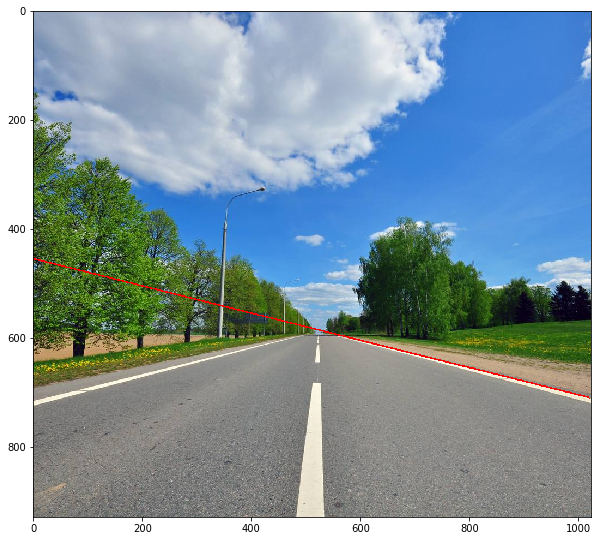

In [94]:
figure = plt.figure(figsize = (10, 10))
plt.imshow(img1)
plt.show()